In [2]:
#Import basic packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
#import data
mall=pd.read_csv('Mall_Customers.csv')

In [4]:
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#Data-Preprocessing
mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
#No missing data

In [6]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#Here the main variables are Anuual Income (k$) and Spending Score(1-100) to cluster the customers ,so no need to worry abouth the object datatype of gender

In [ ]:
#Storing the data with annual income and spending score for data mining

In [8]:
x=mall.iloc[:,3:].values # i need in array format

In [9]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
#K-Means Cluster

In [10]:
from sklearn.cluster import KMeans

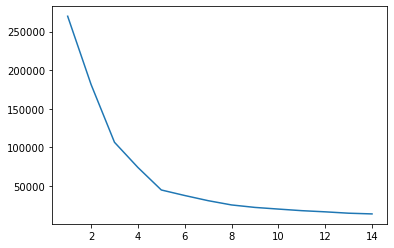

In [11]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15),wcss)    

In [12]:
#K=3 or K=5 ,its upto us that we need to select among both.Take K=5 so it will give more granukar level.

In [13]:
kmeans.inertia_ #this is the latest updated centroid value

13373.36022798008

In [15]:
wcss#These are the 15 centroid values obtained after each iteration

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37265.86520484346,
 30566.45113025185,
 25018.57633477634,
 21806.81299869546,
 19657.78360870395,
 17584.589416163646,
 16076.144767635464,
 14300.044641632878,
 13373.36022798008]

In [16]:
#As per elbow method we have to take K=5
kmeans=KMeans(n_clusters=5,init='k-means++')

In [17]:
y_kmeans=kmeans.fit_predict(x)

In [18]:
y_kmeans #0,1,2,3,4 clusters that is basically total 5 clusters formed

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0,
       4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [20]:
#Appned these cluster value to original dataset
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
pd.DataFrame(y_kmeans)

,0
0,4
1,1
2,4
3,1
4,4
...,...
195,2
196,3
197,2
198,3


In [22]:
combind=pd.concat([mall,pd.DataFrame(y_kmeans)],axis=1)#concat means append and we have to convert y_kmeans to dataframe only then we can append to mall dataframe

In [23]:
combind

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),0
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,3
197,198,Male,32,126,74,2
198,199,Male,32,137,18,3


In [24]:
#Export the dataset
combind.to_csv('new_mall_dataset.csv')#to give to client we have to export to csv and share that file

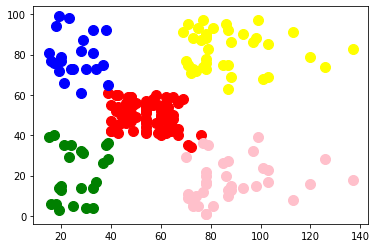

In [29]:
#Visualization for presentation purpose
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1],s=100,c='red',label='Cluster_0')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1],s=100,c='blue',label='Cluster_1')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1],s=100,c='yellow',label='Cluster_2')
plt.scatter(x[y_kmeans==3,0], x[y_kmeans==3,1],s=100,c='pink',label='Cluster_3')
plt.scatter(x[y_kmeans==4,0], x[y_kmeans==4,1],s=100,c='green',label='Cluster_4')

In [30]:
#yellow is the best customers as x axis(salary) and yaxis(spending) is more#prime customers where brownie pts and other 
#blue is also good customers but salary is less so if no fradulent is not there then its good
#Pink customers have high salary so more marketting needed to sepnd more
#Red -average customers
#green is like high risk customers

In [ ]:
#Hierarchical clustering

In [33]:
import scipy.cluster.hierarchy as sch


<function matplotlib.pyplot.show(close=None, block=None)>

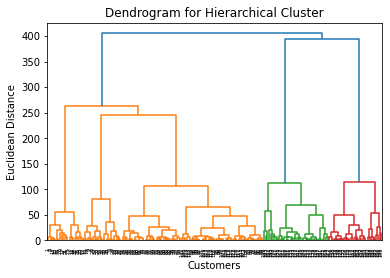

In [35]:
dendogram=sch.dendrogram(sch.linkage(x,method='ward'))#ward is the euclidean distance not the squared one the normal minimum distance (#Ward is the minimum distance that we calculated in notebook using tables a.b.c.d.e)
plt.title('Dendrogram for Hierarchical Cluster')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show#in jupyter notebook we will get some message and values so plt.show() will avoid that

In [36]:
#Take K=5 as per dendrogram which gives more granular results
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward') #Ward is the minimum distance that we calculated in notebook using tables a.b.c.d.e
y_hc=hc.fit_predict(x)

In [37]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [38]:
#append to actual dataset
combind_1=pd.concat([mall,pd.DataFrame(y_hc)],axis=1)

In [39]:
combind_1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),0
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


In [40]:
combind_1.to_csv('hierarchical_mall.csv')

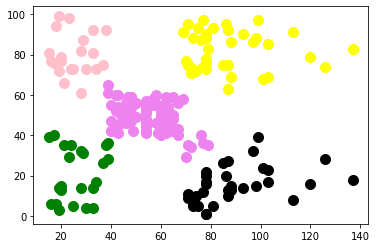

In [41]:
#Visualization will be same as Kmeans(same results)#cluster name may 
#Visualization for presentation purpose
plt.scatter(x[y_hc==0,0], x[y_hc==0,1],s=100,c='black',label='Cluster_0')
plt.scatter(x[y_hc==1,0], x[y_hc==1,1],s=100,c='violet',label='Cluster_1')
plt.scatter(x[y_hc==2,0], x[y_hc==2,1],s=100,c='yellow',label='Cluster_2')
plt.scatter(x[y_hc==3,0], x[y_hc==3,1],s=100,c='pink',label='Cluster_3')
plt.scatter(x[y_hc==4,0], x[y_hc==4,1],s=100,c='green',label='Cluster_4')

In [ ]:
#Do either kmeans or hierarchical clustering.In hierarchial